# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"

base_url = url + "appid=" + api_key 

count = 0
recordcount = 0
setcount = 1

city_data = []
print("Beginning Data Retrieval")
print("--------------------------------------------------")
for city in cities:
    count += 1
    if (count % 50 ==0 and count >= 50):
        recordcount = 0
        setcount += 1
    recordcount = recordcount + 1 
    print("Processing Record " + str(recordcount)+ " " + "set" + " " + str(setcount) + " " + "|"+  city)
    query_url = base_url + "&q=" + city
        
    try: 
            
        city_response = requests.get(query_url)
        city_json = city_response.json()

        city_max_temp = city_json["main"]["temp_max"]
        city_lat = city_json["coord"]["lat"]
        city_humidity = city_json["main"]["humidity"]
        city_cloudiness = city_json["clouds"]["all"]
        city_lng = city_json["coord"]["lon"]
        city_wind_speed = city_json["wind"]["speed"]
        country = city_json["sys"]["country"]
        date = city_json["dt"]
        city_name = city_json["name"]



        city_data.append({
            "Max temp" : city_max_temp,
            "Lat" : city_lat,
            "Humidity" : city_humidity,
            "Cloudiness":city_cloudiness,
            "Lng": city_lng,
            "Wind Speed": city_wind_speed,
             "Country" : country,
            "Date": date,
            "City": city_name
        })
        
    except:
        print("This city is not found...Skipping" + " " + city)

print("---------------------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------------------")


    

    
    

    

    


Beginning Data Retrieval
--------------------------------------------------
Processing Record 1 set 1 |kapaa
Processing Record 2 set 1 |machali
This city is not found...Skipping machali
Processing Record 3 set 1 |illoqqortoormiut
This city is not found...Skipping illoqqortoormiut
Processing Record 4 set 1 |norman wells
Processing Record 5 set 1 |iglesias
Processing Record 6 set 1 |bluff
Processing Record 7 set 1 |matagami
Processing Record 8 set 1 |punta arenas
Processing Record 9 set 1 |albany
Processing Record 10 set 1 |east london
Processing Record 11 set 1 |quatre cocos
Processing Record 12 set 1 |ponta delgada
Processing Record 13 set 1 |clyde river
Processing Record 14 set 1 |katsuura
Processing Record 15 set 1 |nishihara
Processing Record 16 set 1 |cape town
Processing Record 17 set 1 |provideniya
Processing Record 18 set 1 |cabo san lucas
Processing Record 19 set 1 |san patricio
Processing Record 20 set 1 |tapes
Processing Record 21 set 1 |busselton
Processing Record 22 set 1 |

Processing Record 47 set 4 |vila
Processing Record 48 set 4 |tsiroanomandidy
Processing Record 49 set 4 |trairi
Processing Record 50 set 4 |inhambane
Processing Record 1 set 5 |marcona
This city is not found...Skipping marcona
Processing Record 2 set 5 |candawaga
This city is not found...Skipping candawaga
Processing Record 3 set 5 |nacozari
Processing Record 4 set 5 |pangnirtung
Processing Record 5 set 5 |high prairie
Processing Record 6 set 5 |baculin
Processing Record 7 set 5 |yongzhou
Processing Record 8 set 5 |kedougou
Processing Record 9 set 5 |longyearbyen
Processing Record 10 set 5 |berwick
Processing Record 11 set 5 |te anau
Processing Record 12 set 5 |mount gambier
Processing Record 13 set 5 |shaunavon
Processing Record 14 set 5 |nador
Processing Record 15 set 5 |lasa
Processing Record 16 set 5 |lovozero
Processing Record 17 set 5 |norman
Processing Record 18 set 5 |kaitangata
Processing Record 19 set 5 |sedro-woolley
Processing Record 20 set 5 |yaan
Processing Record 21 set 

Processing Record 50 set 8 |bhachau
Processing Record 1 set 9 |oarai
Processing Record 2 set 9 |bafq
Processing Record 3 set 9 |boa vista
Processing Record 4 set 9 |kirakira
Processing Record 5 set 9 |durango
Processing Record 6 set 9 |kurmanayevka
Processing Record 7 set 9 |savannah bight
Processing Record 8 set 9 |kholodnyy
Processing Record 9 set 9 |promakhoi
This city is not found...Skipping promakhoi
Processing Record 10 set 9 |ashoknagar
Processing Record 11 set 9 |palabuhanratu
This city is not found...Skipping palabuhanratu
Processing Record 12 set 9 |tura
Processing Record 13 set 9 |daru
Processing Record 14 set 9 |san diego de la union
Processing Record 15 set 9 |chimbote
Processing Record 16 set 9 |lincoln
Processing Record 17 set 9 |swinoujscie
Processing Record 18 set 9 |kutum
Processing Record 19 set 9 |shitanjing
Processing Record 20 set 9 |helena
Processing Record 21 set 9 |puerto madryn
Processing Record 22 set 9 |abonnema
Processing Record 23 set 9 |mayachnyy
Processi

Processing Record 44 set 12 |mnogovershinnyy
Processing Record 45 set 12 |barra do garcas
Processing Record 46 set 12 |fort-shevchenko
Processing Record 47 set 12 |vidim
Processing Record 48 set 12 |concordia
Processing Record 49 set 12 |vostok
Processing Record 50 set 12 |onega
Processing Record 1 set 13 |eirunepe
Processing Record 2 set 13 |rassvet
Processing Record 3 set 13 |yulara
Processing Record 4 set 13 |san carlos de bariloche
Processing Record 5 set 13 |qingyuan
Processing Record 6 set 13 |sika
Processing Record 7 set 13 |sainte-thecle
Processing Record 8 set 13 |belyy yar
Processing Record 9 set 13 |tobol
Processing Record 10 set 13 |jepara
Processing Record 11 set 13 |leningradskiy
Processing Record 12 set 13 |waingapu
Processing Record 13 set 13 |albenga
Processing Record 14 set 13 |burnie
---------------------------------------------------
Data Retrieval Complete
---------------------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_data_df = pd.DataFrame(city_data )
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max temp,Wind Speed
0,Kapaa,90,US,1559701300,78,22.08,-159.32,303.150,7.70
1,Norman Wells,90,CA,1559701302,93,65.28,-126.83,277.150,1.50
2,Iglesias,90,ES,1559701302,93,42.30,-3.99,283.150,5.70
3,Bluff,100,AU,1559701303,24,-23.58,149.07,292.953,5.36
4,Matagami,100,NG,1559701303,95,9.67,8.40,295.553,2.74


In [9]:
city_data_df.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max temp      555
Wind Speed    555
dtype: int64

In [10]:
city_data_df.to_csv("city_data_df.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [11]:
Latitude = city_data_df["Lat"]
Max_temp = city_data_df["Max temp"]


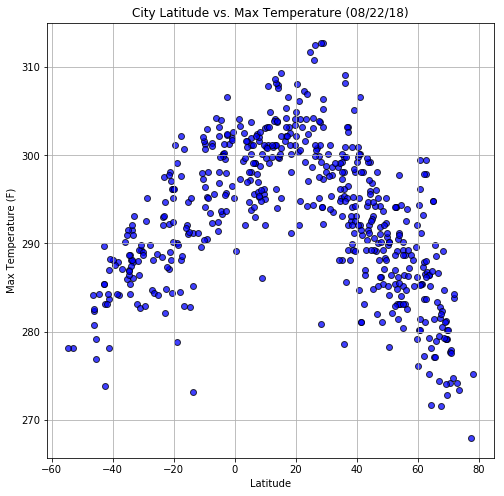

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(Latitude, Max_temp, marker="o", facecolors="blue", edgecolors="black", linewidths =1,
             alpha=0.75, label="Cities")

plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()
plt.show()
plt.savefig("../Images/CityLatvsMaxTemp.png")

Observation 
As we can see from the scatter plot "City Latitude vs. Max Temperature (08/22/18), when the latitude increases from -60 to 0, there is a max temperature increase, but when the lattitude increases from 0 to 80, there is a max temperature decrease. In conclusion, the further away the Latitude is from 0/20 then the lower the Max Temperature is, which also means that as the lattitude approaches 0/20, the max temperature increases.

#### Latitude vs. Humidity Plot

In [13]:
Latitude = city_data_df["Lat"]
Humidity = city_data_df["Humidity"]

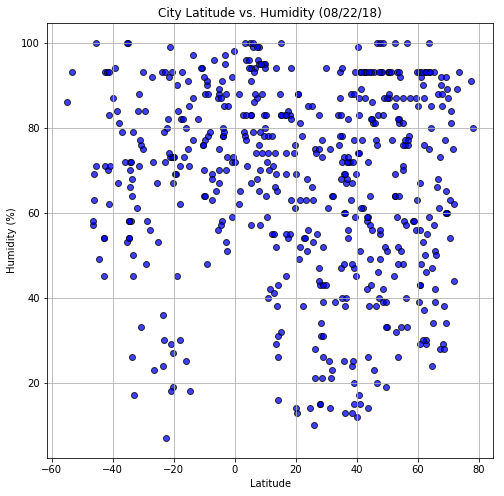

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(Latitude, Humidity, marker="o", facecolors="blue", edgecolors="black", linewidths =1,
             alpha=0.75, label="Cities")
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()
plt.show()
plt.savefig("../Images/CityLatvsHumidity.png")

#### Latitude vs. Cloudiness Plot

In [15]:
Latitude = city_data_df["Lat"]
Cloudiness = city_data_df["Cloudiness"]

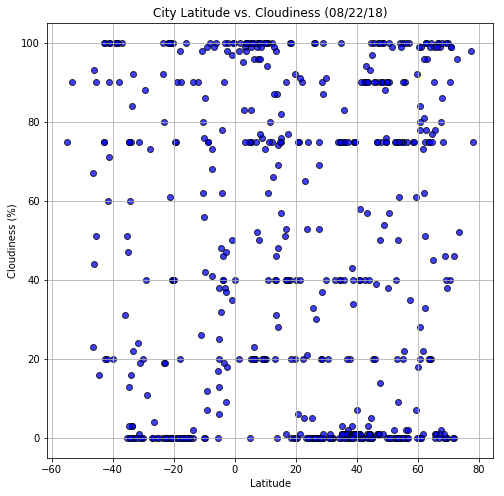

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(Latitude, Cloudiness, marker="o", facecolors="blue", edgecolors="black", linewidths =1,
             alpha=0.75, label="Cities")

plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
plt.savefig("../Images/CityLatvsCloudiness.png")

Observation 

As we can see from the scatter plot, "City Latitude vs. Cloudiness (08/22/18), there seems to be no correlation between Latitude and Cloudiness because we cannot draw any specific trend from the plot.  

#### Latitude vs. Wind Speed Plot

In [17]:
#Setting the x and y values by selected the desired columns 
Latitude = city_data_df["Lat"]
Wind_Speed = city_data_df["Wind Speed"]

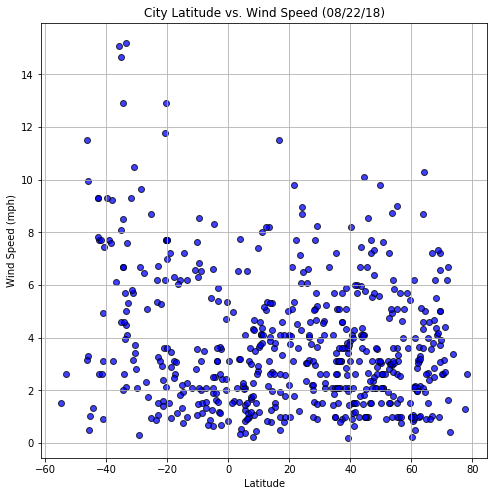

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(Latitude, Wind_Speed, marker="o", facecolors="blue", edgecolors="black", linewidths =1,
             alpha=0.75, label="Cities")

plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid()
plt.show()
plt.savefig("../Images/CityLatvsWindSpeed.png")

Observation

As we can see from the scatter plot, "City Latitude vs. Wind Speed (08/22/18), the wind speed look to be highly concentrated from 0 to 6 mph for most of the City Latitude. However, the wind speed look to be less concentrated from 10 to 14 mph for most of the City Latitude. This means that wind speed at a lower miles per hour is more consistent than wind speed at a higher miles per hour for most city latitude.